# EDA

Meteorological Parameters & Data Units

| Code      | Meaning      | Unit   |
|-------------|-------------|------------|
| temp   | Air Temperature   | °C   |
| dwpt   | Dew Point   | °C   |
| rhum   | Relative Humidity  | %   |
| prcp   | Total Precipitation  | mm   |
| snow   | Snow Depth   | mm   |
| wdir   | Wind (From) Direction   | Degrees   |
| wspd   | Average Wind Speed   | km/h   |
| wpgt   | Wind Peak Gust   | km/h   |
| pres   | Sea-Leavel Air Pressure   | hPa   |
| tsun   | Total Sunshine Duration   | Minutes
| coco   | Weather Condition Code   | 

Weather Condition Codes
| Code | Weather Condition       |
|------|--------------------------|
| 1    | Clear                   |
| 2    | Fair                    |
| 3    | Cloudy                  |
| 4    | Overcast                |
| 5    | Fog                     |
| 6    | Freezing Fog            |
| 7    | Light Rain              |
| 8    | Rain                    |
| 9    | Heavy Rain              |
| 10   | Freezing Rain           |
| 11   | Heavy Freezing Rain     |
| 12   | Sleet                   |
| 13   | Heavy Sleet             |
| 14   | Light Snowfall          |
| 15   | Snowfall                |
| 16   | Heavy Snowfall          |
| 17   | Rain Shower             |
| 18   | Heavy Rain Shower       |
| 19   | Sleet Shower            |
| 20   | Heavy Sleet Shower      |
| 21   | Snow Shower             |
| 22   | Heavy Snow Shower       |
| 23   | Lightning               |
| 24   | Hail                    |
| 25   | Thunderstorm            |
| 26   | Heavy Thunderstorm      |
| 27   | Storm                   |

source: https://dev.meteostat.net/formats.html#meteorological-parameters

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import warnings 
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv('./../data/raw/weatherQN_2021_2025.csv')
data.head(10)

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2021-01-02 00:00:00,20.0,17.4,85.0,NaN,NaN,350.0,20.2,NaN,1017.9,NaN,NaN
1,2021-01-02 03:00:00,20.0,17.8,87.0,0.2,NaN,343.0,17.6,NaN,1016.1,NaN,NaN
2,2021-01-02 06:00:00,19.8,17.8,88.0,0.1,NaN,339.0,17.6,NaN,1016.7,NaN,NaN
3,2021-01-02 09:00:00,20.2,18.3,89.0,0.2,NaN,347.0,18.7,NaN,1018.4,NaN,NaN
4,2021-01-02 12:00:00,22.0,18.0,78.0,0.1,NaN,3.0,28.4,NaN,1016.4,NaN,NaN
5,2021-01-02 15:00:00,21.4,18.2,82.0,0.2,NaN,2.0,27.4,NaN,1015.0,NaN,NaN
6,2021-01-02 18:00:00,20.4,18.5,89.0,0.4,NaN,350.0,18.0,NaN,1016.3,NaN,NaN
7,2021-01-02 21:00:00,20.2,18.5,90.0,0.2,NaN,344.0,17.6,NaN,1017.6,NaN,NaN
8,2021-01-03 00:00:00,20.1,18.6,91.0,0.3,NaN,345.0,16.2,NaN,1017.3,NaN,NaN
9,2021-01-03 03:00:00,19.9,18.4,91.0,0.1,NaN,333.0,14.0,NaN,1015.2,NaN,NaN


In [28]:
data.shape, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12195 entries, 0 to 12194
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    12195 non-null  object 
 1   temp    12195 non-null  float64
 2   dwpt    12195 non-null  float64
 3   rhum    12195 non-null  float64
 4   prcp    12162 non-null  float64
 5   snow    0 non-null      float64
 6   wdir    12195 non-null  float64
 7   wspd    12195 non-null  float64
 8   wpgt    0 non-null      float64
 9   pres    12195 non-null  float64
 10  tsun    0 non-null      float64
 11  coco    7954 non-null   float64
dtypes: float64(11), object(1)
memory usage: 1.1+ MB


((12195, 12), None)

In [29]:
def convert_wdir_to_direction(wdir):
    if wdir >= 315 or wdir < 45:
        return "N"
    if wdir >= 45 and wdir < 135:
        return "E"
    if wdir >= 135 and wdir < 225:
        return "S"
    if wdir >= 225 and wdir < 315:
        return "W"
    
data["direction"] = data["wdir"].apply(convert_wdir_to_direction)

In [30]:
direction_count = data["direction"].value_counts()
direction_count

direction
N    4561
W    3877
S    2076
E    1681
Name: count, dtype: int64

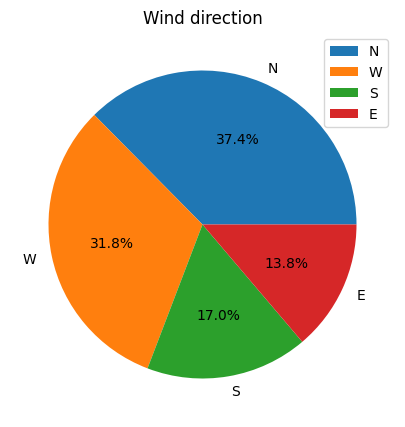

In [31]:
# Pie chart of wind direction
plt.figure(figsize=(10, 5))

plt.pie(direction_count, labels = direction_count.index, autopct='%1.1f%%')
plt.title("Wind direction")

plt.legend()
plt.show()

From the pie chart above, we can observe that **the most popular wind direction** in Quy Nhon City is `North` **(42.7%)**.

## What is the coldest and hottest months by year?
Identifying the coldest and hottest months in Quy Nhon by year provides valuable insights that can benefit various sectors:
1. Tourism Development
2. Agricultural Planning
3. Health and Safety Measures

In [35]:
data['time'] = pd.to_datetime(data['time'])
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

In [36]:
# take average temp by month and year
avg_temp_by_month = data.groupby(["year", "month"])["temp"].mean()
avg_temp_by_month

year  month
2021  1        21.296250
      2        22.080804
      3        25.085484
      4        26.629583
      5        28.410081
      6        30.882500
      7        29.555645
      8        29.654032
      9        27.006250
      10       26.132258
      11       24.656667
      12       23.065323
2022  1        22.968548
      2        23.268750
      3        25.059274
      4        25.510833
      5        27.365289
      6        29.138333
      7        28.408065
      8        28.147984
      9        26.708750
      10       25.352016
      11       25.201667
      12       22.704435
2023  1        22.072177
      2        23.226339
      3        23.946371
      4        27.495833
      5        28.619758
      6        29.522083
      7        29.208468
      8        30.570565
      9        27.906667
      10       26.240323
      11       25.033750
      12       23.908065
2024  1        22.859677
      2        23.801293
      3        25.375806
      4      

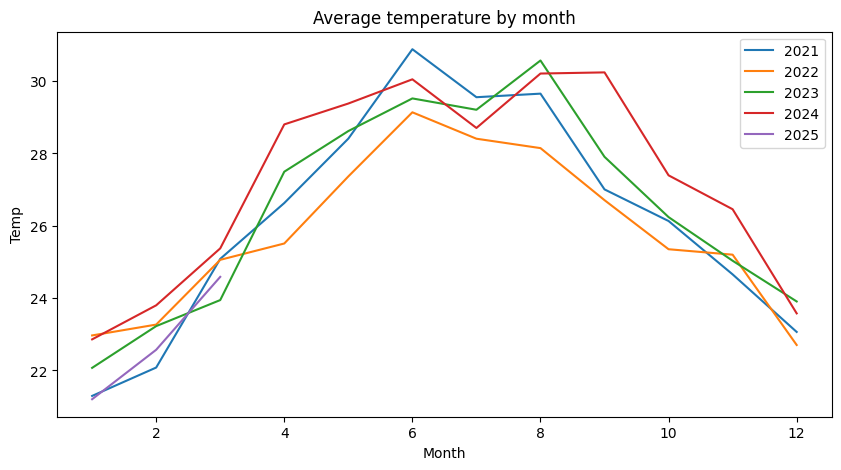

In [38]:
plt.figure(figsize=(10, 5))

for year in avg_temp_by_month.index.levels[0]:
    plt.plot(avg_temp_by_month[year].index, avg_temp_by_month[year].values, label = year)

plt.title("Average temperature by month")
plt.xlabel('Month')
plt.ylabel('Temp')
plt.legend()
plt.show()

From the line plot above, we can gather valuable insights.
+  Between 2021 and 2024, the temperature trends appear relatively consistent. 
+  The **hottest months** in Quy Nhon are typically **June** and **August**
+  While the **coldest months** are **December** and **January**.
+  
Interestingly, the line plot resembles an inverted bell shape, similar to the curve of a [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution).